In [1]:
import pandas as pd 
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
%%time
# generate array of 100 gene names
genes = ['gene' + str(num) for num in range(1, 101)]

# array of sample names
wt = ['wt' + str(num) for num in range(1, 6)]
ko = ['ko' + str(num) for num in range(1, 6)]

# build empty dataframe 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

# populate dataframe
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 10000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 10000), size=5)

data.head()

CPU times: user 73.6 ms, sys: 2.33 ms, total: 75.9 ms
Wall time: 74.8 ms


In [3]:
# need to center and scale the data 
# the data also needs to be transposed. The columns or varibales become the rows for PCA loading scores
scaled_data = preprocessing.scale(data.T)

In [4]:
# create PCA object
pca= PCA()

In [5]:
# calculate loading scores and variation each principle compenent acount for 
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# generate coordinates based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [7]:
# scree plot
# generate percentage that each PCA accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# generate labels for scree plot
labels = ['PC' + str(num) for num in range(1, len(per_var) + 1)]

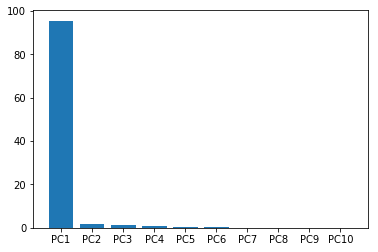

In [8]:
plt.bar(left=range(1, len(per_var) + 1), height = per_var, tick_label=labels)
plt.show()

In [9]:
# generate df with pca coordinates, variables are presented as rows, thus the index should be variable names, the columns represent the different PCA axis 
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.740670,-0.621390,-1.119775,-0.088301,-0.251540,1.059870,-0.085858,-0.175621,-0.075863,-1.755540e-15
wt2,9.748656,-1.561225,-0.117439,0.004804,-0.580250,-0.165888,0.184504,0.464000,0.135958,-9.159340e-16
wt3,9.656490,1.375793,0.998885,-1.277307,-0.696087,-0.362539,-0.497328,-0.145341,0.017934,3.053113e-16
wt4,9.966254,-1.253398,1.209591,0.326376,0.547111,-0.332803,0.585451,-0.263631,-0.113308,-1.533496e-15
wt5,9.748483,2.095636,-1.002521,1.035861,0.955033,-0.203041,-0.189243,0.121290,0.033295,1.720846e-15


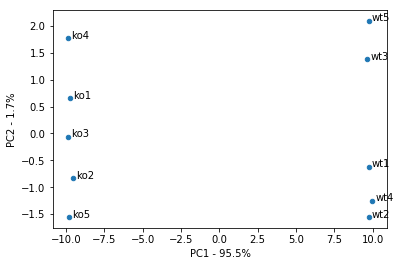

In [10]:
# plot pc1 versus pc2
pca_df.plot(kind='scatter', x='PC1', y='PC2')
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

# plot labels
for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC1'][sample]+.2,  pca_df['PC2'][sample]))

In [12]:
# let's look at the loading score for PC1 to see which ones had the largest influence on separating the two clusters along the x axis
# series object from loading scores in PC1
# top 10 by absolute value, capturing index 
loading_scores = pd.DataFrame(pca.components_[0], index = genes)
sorted_loading_scores = loading_scores.abs().sort_values( by = [0],ascending=False)
top_ten_genes = sorted_loading_scores[0:10].index.values
loading_scores[loading_scores.index.isin(top_ten_genes)]

,0
gene1,0.102306
gene6,0.102307
gene11,0.102305
gene15,0.102314
gene21,-0.102314
gene49,-0.102307
gene50,0.102306
gene56,0.102312
gene63,0.102311
gene99,-0.102320
